In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from skimage.metrics import structural_similarity as ssim
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from matplotlib.colors import Normalize

# **Уменьшение палитры изображения**

In [19]:
def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

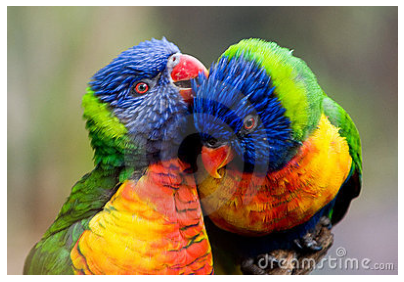

In [20]:
img = cv2.imread('birds.jpg') # считать картинку
draw_picture(img) # нарисовать картинку

In [21]:
imga = np.reshape(img, (110000, 3))

**KMeans**

2


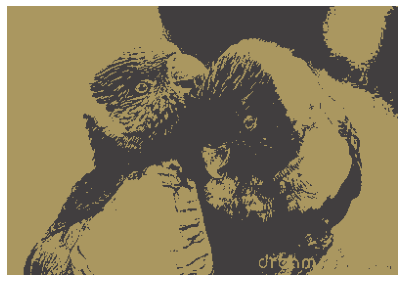

0.4160154963584341
3


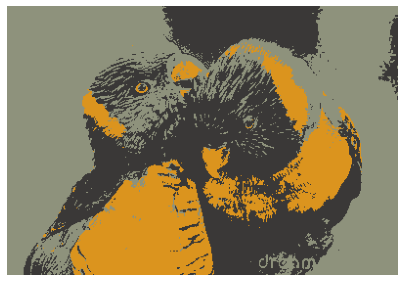

0.5253518147930967
10


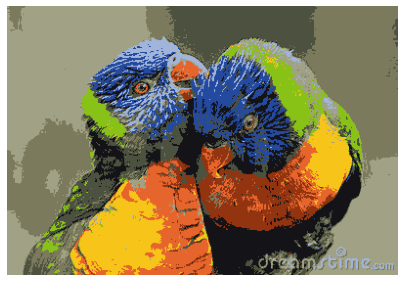

0.6673322623812762
20


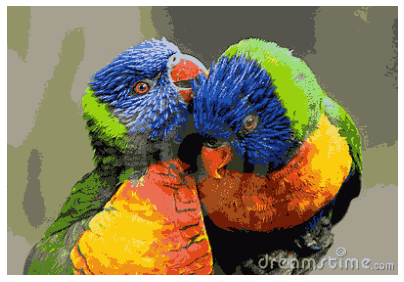

0.7547273087204944


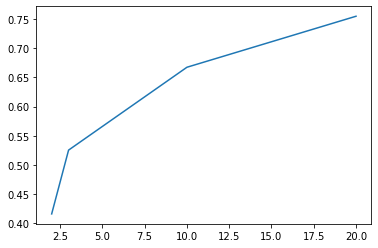

In [22]:
s = [2, 3, 10, 20]
e = []
for i in s:
  km  = KMeans(n_clusters=i)
  img_pred = km.fit_predict(imga)
  centers = np.uint8(km.cluster_centers_)
  img_pred = centers[img_pred.flatten()]
  img_pred = np.reshape(img_pred, img.shape)
  print(i)
  draw_picture(img_pred)
  print(ssim(img, img_pred, data_range=img_pred.max() - img_pred.min(), multichannel=True))
  e.append(ssim(img, img_pred, data_range=img_pred.max() - img_pred.min(), multichannel=True))
plt.plot(s, e)
plt.show()

**DBSCAN**

1


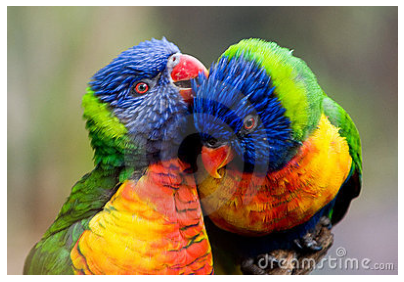

1.0
2


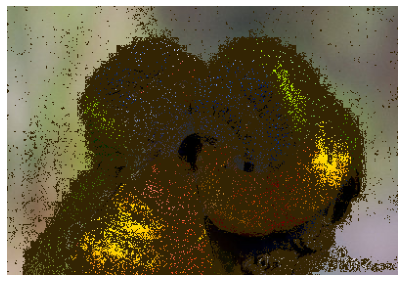

0.28510502095014684
3


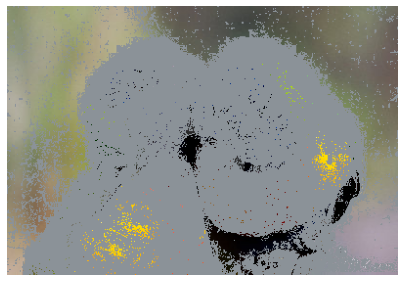

0.32234594845939957
4


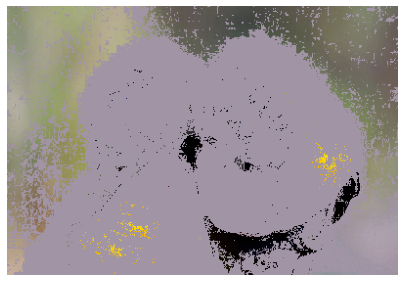

0.2806741386696299
5


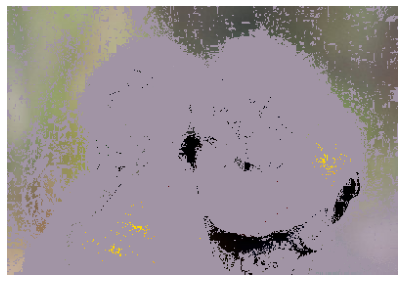

0.2640133575624471
6


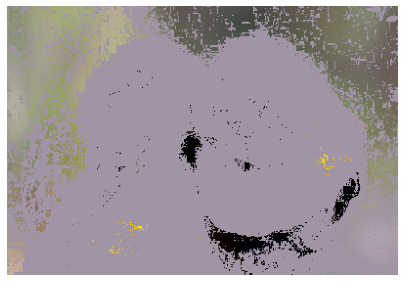

0.25346983107198146
7


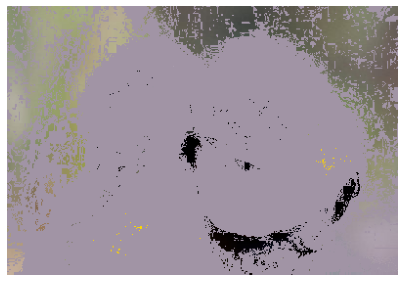

0.24940649923467176


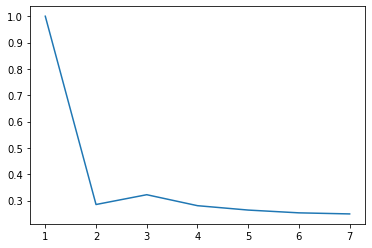

In [ ]:
s = []
e = []
for i in range(1, 8):
  dbs  = DBSCAN(eps=0.5, min_samples=i)
  img_pred = dbs.fit_predict(imga)
  centers = np.uint8([np.mean(imga[img_pred==k],axis=0) for k in range(1+max(img_pred))])
  img_pred = centers[img_pred.flatten()]
  img_pred = np.reshape(img_pred, img.shape)
  print(i)
  draw_picture(img_pred)
  print(ssim(img, img_pred, data_range=img_pred.max() - img_pred.min(), multichannel=True))
  s.append(i)
  e.append(ssim(img, img_pred, data_range=img_pred.max() - img_pred.min(), multichannel=True))
plt.plot(s, e)
plt.show()

**AgglomerativeClustering**

In [ ]:
ac = AgglomerativeClustering()
img_pred = ac.fit_predict(imga)
centers = np.uint8([np.mean(imga[img_pred==k],axis=0) for k in range(1+max(img_pred))])
img_pred = centers[img_pred.flatten()]
img_pred = np.reshape(img_pred, img.shape)
print(i)
draw_picture(img_pred)
print(ssim(img, img_pred, data_range=img_pred.max() - img_pred.min(), multichannel=True))

**Как я понял размер фотографии слишком большой для AgglomerativeClustering. Поэтому уменьшим фотографию в два раза.**

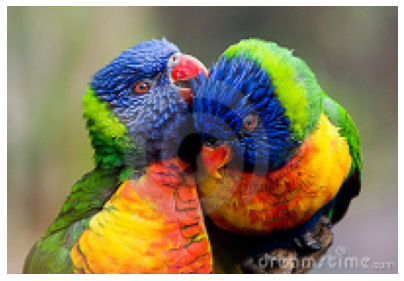

In [ ]:
imgb= cv2.resize(img, dsize=(img.shape[1]//2, img.shape[0]//2))
draw_picture(imgb)
imgb_r = np.reshape(imgb, (27400, 3))

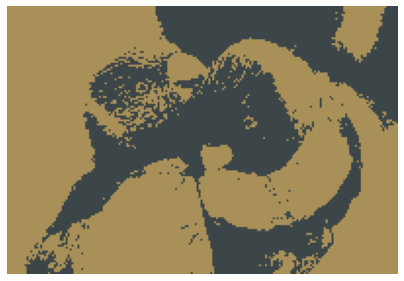

0.34936270880073533


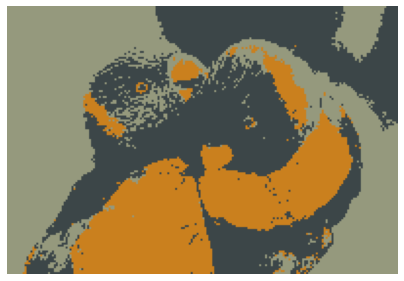

0.4461983358148151


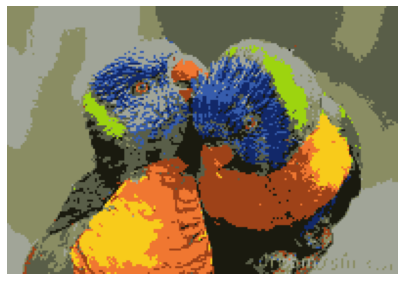

0.6340486286191447


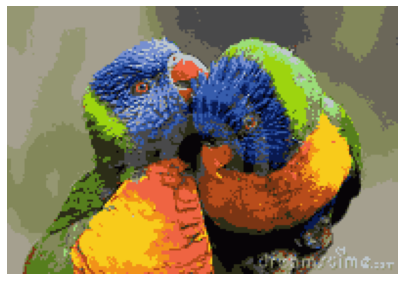

0.7332148361783952


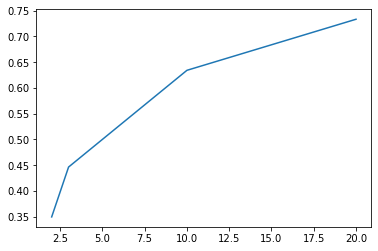

In [ ]:
s = [2, 3, 10, 20]
e = []
for i in s:
  ac = AgglomerativeClustering(n_clusters=i)
  img_pred = ac.fit_predict(imgb_r)
  centers = np.uint8([np.mean(imgb_r[img_pred==k],axis=0) for k in range(1+max(img_pred))])
  img_pred = centers[img_pred.flatten()]
  img_pred = np.reshape(img_pred, imgb.shape)
  draw_picture(img_pred)
  print(ssim(imgb, img_pred, data_range=img_pred.max() - img_pred.min(), multichannel=True))
  e.append(ssim(imgb, img_pred, data_range=img_pred.max() - img_pred.min(), multichannel=True))
plt.plot(s, e)
plt.show()

**DBSCAN показал лучший результат. Поэтому рассмотрим его на других картинках**

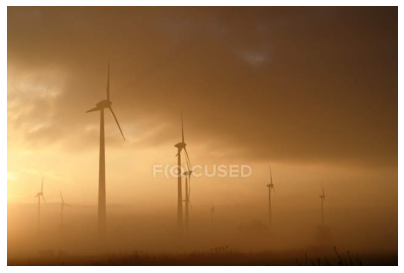

In [38]:
imgv = cv2.imread('v.jpg')
draw_picture(imgv)

In [40]:
imgvr = np.reshape(imgv, (280800, 3))

1


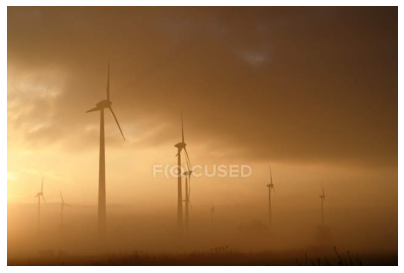

1.0
2


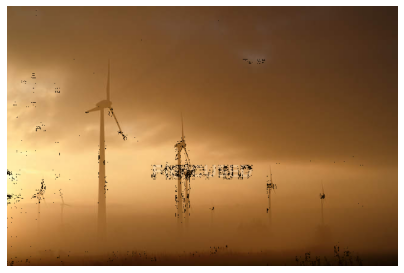

0.9453796347812761
3


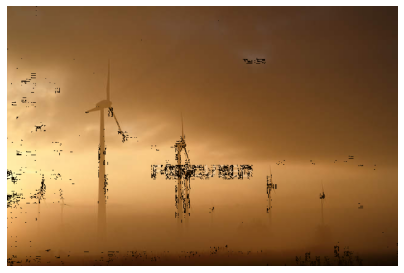

0.917688516243088
4


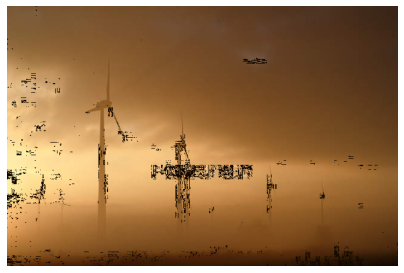

0.9006242712000111
5


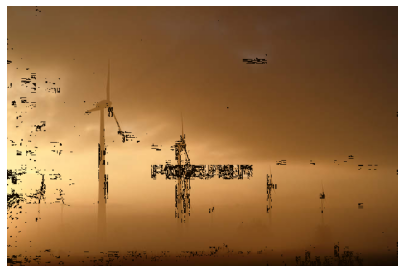

0.8885015206993305
6


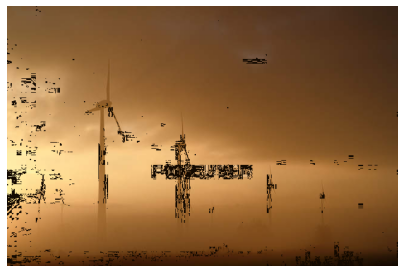

0.8778154072901471
7


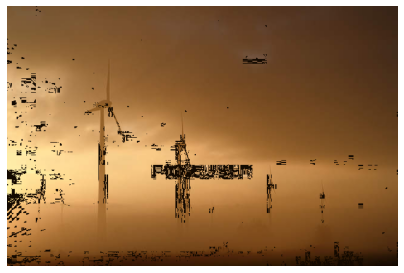

0.867950740930436


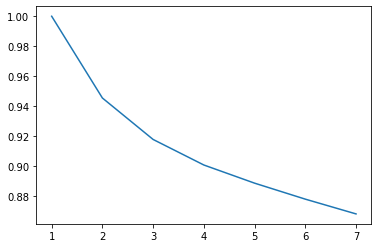

In [42]:
s = []
e = []
for i in range(1, 8):
  dbs  = DBSCAN(eps=0.5, min_samples=i)
  img_pred = dbs.fit_predict(imgvr)
  centers = np.uint8([np.mean(imgvr[img_pred==j],axis=0) for j in range(1+max(img_pred))])
  img_pred = centers[img_pred.flatten()]
  img_pred = np.reshape(img_pred, imgv.shape)
  print(i)
  draw_picture(img_pred)
  print(ssim(imgv, img_pred, data_range=img_pred.max() - img_pred.min(), multichannel=True))
  s.append(i)
  e.append(ssim(imgv, img_pred, data_range=img_pred.max() - img_pred.min(), multichannel=True))
plt.plot(s, e)
plt.show()

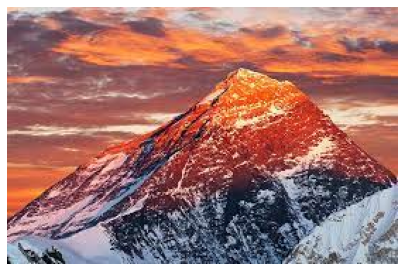

In [43]:
imgg = cv2.imread('g.jpg')
draw_picture(imgg)

In [45]:
imggr = np.reshape(imgg, (50414, 3))

1


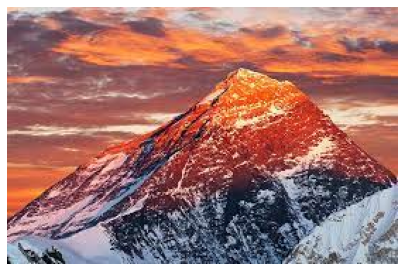

1.0
2


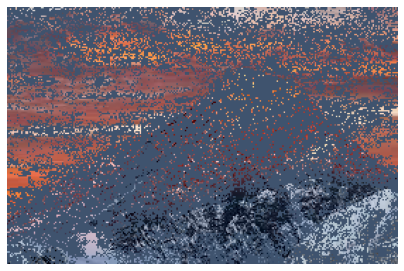

0.30239697605546595
3


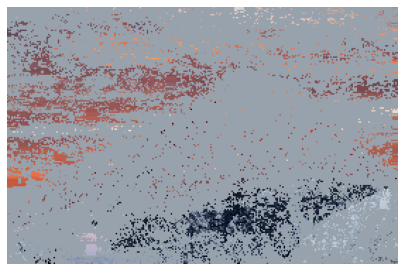

0.19087208337076986
4


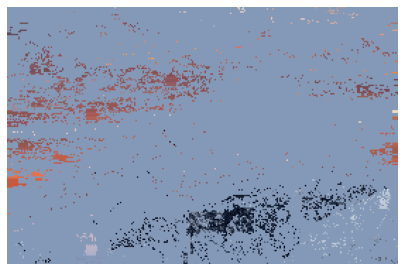

0.15503428648399462
5


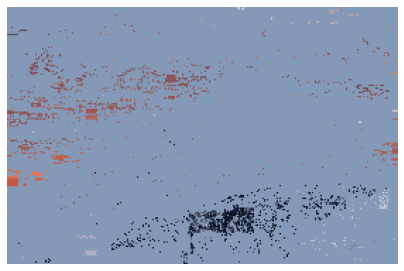

0.13922575967324813
6


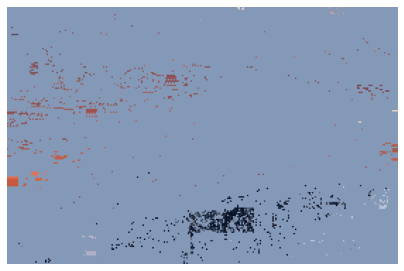

0.13539149131041892
7


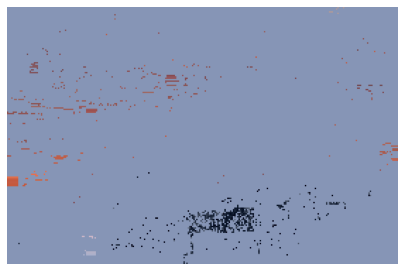

0.13107770655862844


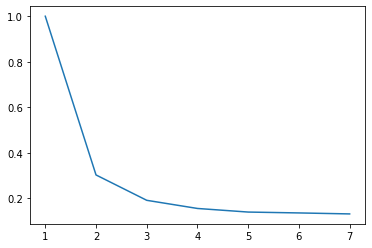

In [46]:
s = []
e = []
for i in range(1, 8):
  dbs  = DBSCAN(eps=0.5, min_samples=i)
  img_pred = dbs.fit_predict(imggr)
  centers = np.uint8([np.mean(imggr[img_pred==j],axis=0) for j in range(1+max(img_pred))])
  img_pred = centers[img_pred.flatten()]
  img_pred = np.reshape(img_pred, imgg.shape)
  print(i)
  draw_picture(img_pred)
  print(ssim(imgg, img_pred, data_range=img_pred.max() - img_pred.min(), multichannel=True))
  s.append(i)
  e.append(ssim(imgg, img_pred, data_range=img_pred.max() - img_pred.min(), multichannel=True))
plt.plot(s, e)
plt.show()

# **Уменьшение размерности помогает классификации лиц**

In [47]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
# эту строчку менять нельзя, ресайзить нельзя

In [48]:
from sklearn.model_selection import train_test_split
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)

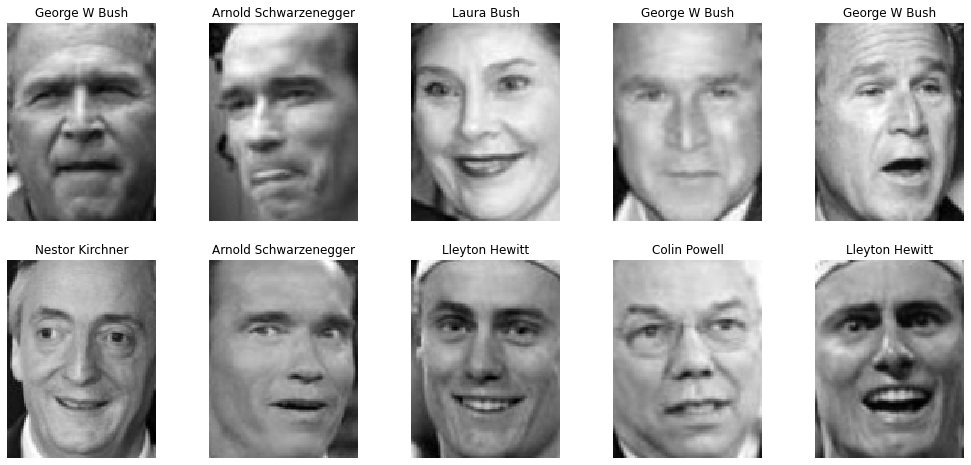

In [50]:
import matplotlib.pyplot as plt
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(names[y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)# первые 10 лиц

**Без уменьшения размерности**

**LogisticRegression**

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.6729957805907173
0.5808248231175588


**DecisionTreeClassifier**

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.2869198312236287
0.19581492348355942


**RandomForestClassifier**

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.4641350210970464
0.29160945822093814


**Const**

In [ ]:
c = np.bincount(y)
y_pred_const = np.argmax(c) * np.ones(len(y_test))
print(accuracy_score(y_test, y_pred_const))
print(f1_score(y_test, y_pred_const, average='macro'))

0.23839662447257384
0.011323779937869524


**Логистическая регрессия справилась лучше всех. Подберем для неё параметры**

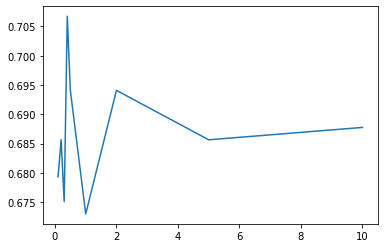

In [51]:
c = [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 5, 10]
e = []
for i in c:
  model = LogisticRegression(class_weight={0:1, 1:i})
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  e.append(accuracy_score(y_test, y_pred))
plt.plot(c, e)
plt.show()

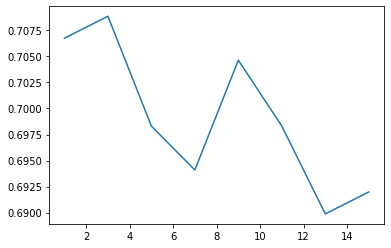

In [ ]:
c = []
e = []
for i in range(1, 16, 2):
  model = LogisticRegression(class_weight={0:1, 1:0.4}, C = i)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  c.append(i)
  e.append(accuracy_score(y_test, y_pred))
plt.plot(c, e)
plt.show()

In [ ]:
model = LogisticRegression(class_weight={0:1, 1:0.4}, C = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.7088607594936709
0.6203035331215996


**Теперь с уменьшением размерности**

0.21993750867935008
0.21993750867935008
0.23629357033745313
0.3154159144563255
0.6012595472850993
0.6445174281349813
0.6529579225107623
0.6524316067212887


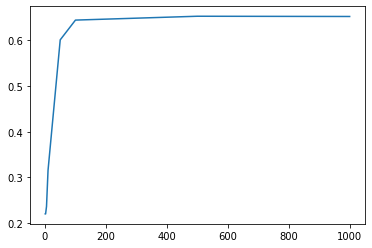

In [ ]:
s = [1, 2, 5, 10, 50, 100, 500, 1000]
e = []
for i in s:
  svd = TruncatedSVD(n_components=i)
  X_train_svd = svd.fit_transform(X_train)
  e.append(cross_val_score(LogisticRegression(), X_train_svd, y_train, scoring='accuracy').mean())
  print(cross_val_score(LogisticRegression(), X_train_svd, y_train, scoring='accuracy').mean())
plt.plot(s, e)
plt.show()

0.2320677683655048
0.22626718511317873
0.24895292320511037
0.33124288293292603
0.5601263713373142
0.5458936258852938
0.6814359116789335
0.6867143452298292


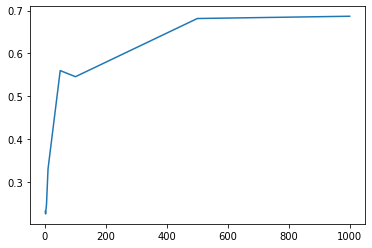

In [ ]:
s = [1, 2, 5, 10, 50, 100, 500, 1000]
e = []
for i in s:
  pca = PCA(n_components=i)
  X_train_pca = pca.fit_transform(X_train)
  e.append(cross_val_score(LogisticRegression(), X_train_pca, y_train, scoring='accuracy').mean())
  print(cross_val_score(LogisticRegression(), X_train_pca, y_train, scoring='accuracy').mean())
plt.plot(s, e)
plt.show()

0.23312178864046657
0.23101930287460073
0.23575753367587832


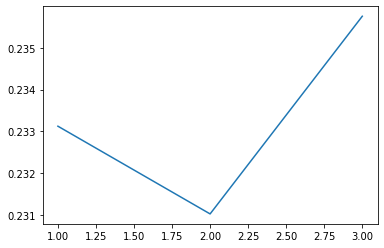

In [ ]:
s = [1, 2, 3]
e = []
for i in s:
  tsne = TSNE(n_components=i, n_iter=400)
  X_train_tsne = tsne.fit_transform(X_train)
  e.append(cross_val_score(LogisticRegression(), X_train_tsne, y_train, scoring='accuracy').mean())
  print(cross_val_score(LogisticRegression(), X_train_tsne, y_train, scoring='accuracy').mean())
plt.plot(s, e)
plt.show()

**TSNE, PCA, SVD на первых трех компонентах показали примерно одинаковый результат. У TSNE accuracy немного хуже чем у других, а у PCA лучше. Берем PCA**

In [9]:
pca = PCA(n_components=1000)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = LogisticRegression(class_weight={0:1, 1:0.4}, C = 3)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.70042194092827
0.6333031564738901


In [36]:
y_pred[y_test[y_pred != y_test][:8]][:len(y_test[y_pred != y_test][:8])]

array([33, 33, 23, 21, 14, 12, 23,  8])

In [37]:
y_test[y_test[y_pred != y_test][:8]][:len(y_test[y_pred != y_test][:8])]

array([15, 15, 22, 21, 31, 12, 22,  8])

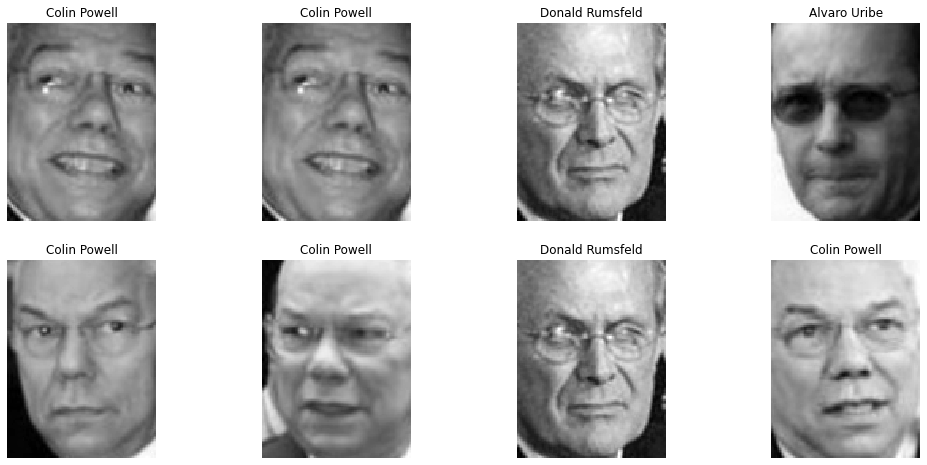

In [34]:
plot_grid(y_test[y_test[y_pred != y_test][:8]], nrows=2, ncols=4)

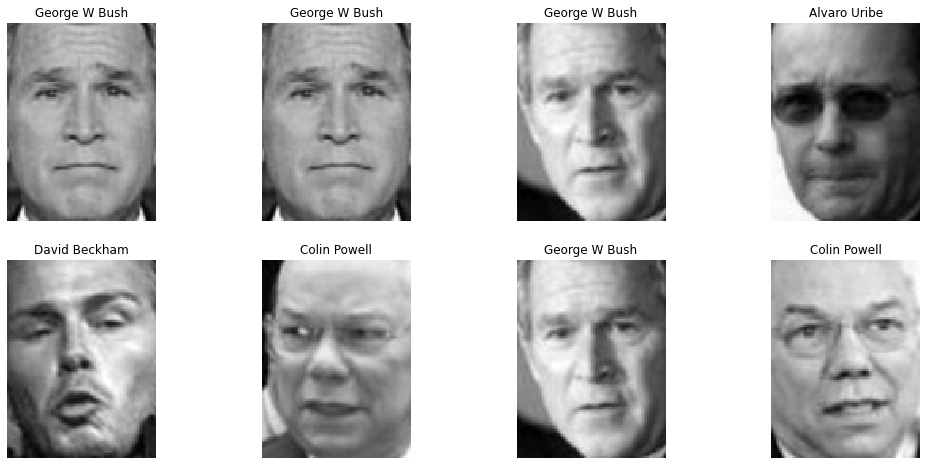

In [35]:
plot_grid(y_pred[y_test[y_pred != y_test][:8]], nrows=2, ncols=4)

**Совпадают 4, 6, 8 фотографии. Остальные неправильно**

**Визуализация**

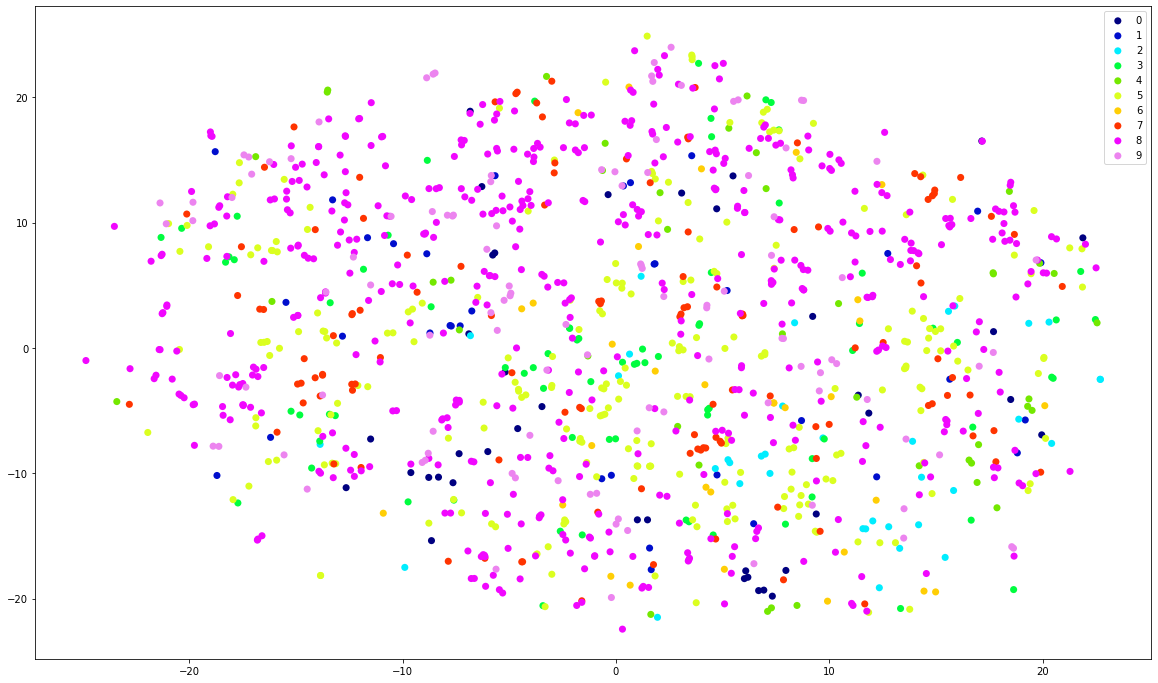

In [ ]:
tsne = TSNE(n_components=2, n_iter=400)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(20, 12))
for d in range(10):
  norm = Normalize(vmin=0, vmax=10)
  color = plt.cm.gist_ncar(norm(d))
  plt.scatter(X_tsne[:, 0][y == d],
                X_tsne[:, 1][y == d],
                c=[color] * len(X_tsne[:, 0][y == d]), label=d, edgecolor='none', s=50)
plt.legend()

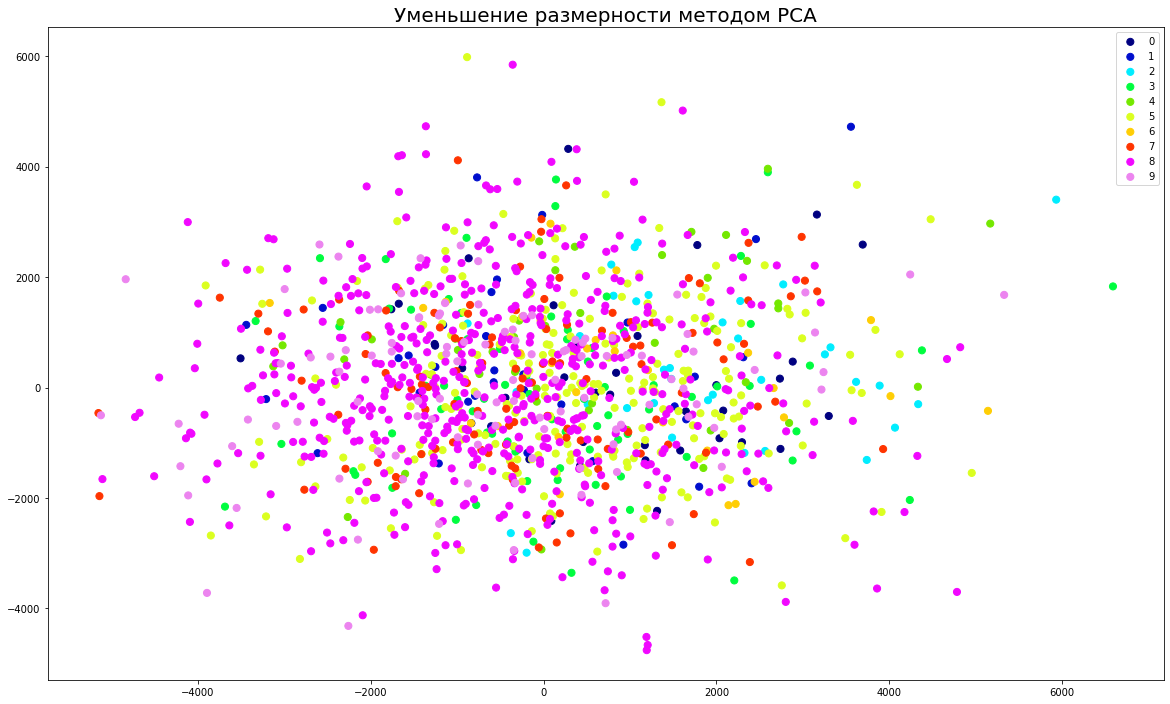

In [53]:
pca = PCA(n_components=1000)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(20, 12))
for d in range(10): # перебираем цифру
    norm = Normalize(vmin=0, vmax=10) # для красивых цветов
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_pca[:, 0][y == d],
                X_pca[:, 1][y == d],
                c=[color] * len(X_pca[:, 0][y == d]), label=d, edgecolor='face', s=50)
plt.title(u"Уменьшение размерности методом PCA", fontsize=20)
plt.legend()

In [ ]:
plt.figure(figsize=(16, 8))
for d in [8,9,5]: # перебираем номер класса
    norm = Normalize(vmin=0, vmax=max(y)+1) # для красивых цветов
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_pca[:, 0][y == d],
                X_pca[:, 1][y == d],
                c=[color] * len(X_pca[:, 0][y == d]), label=names[y_test[d]], edgecolor='face', s=50)
plt.title(u"Уменьшение размерности методом TSNE", fontsize=20)
plt.legend()
None

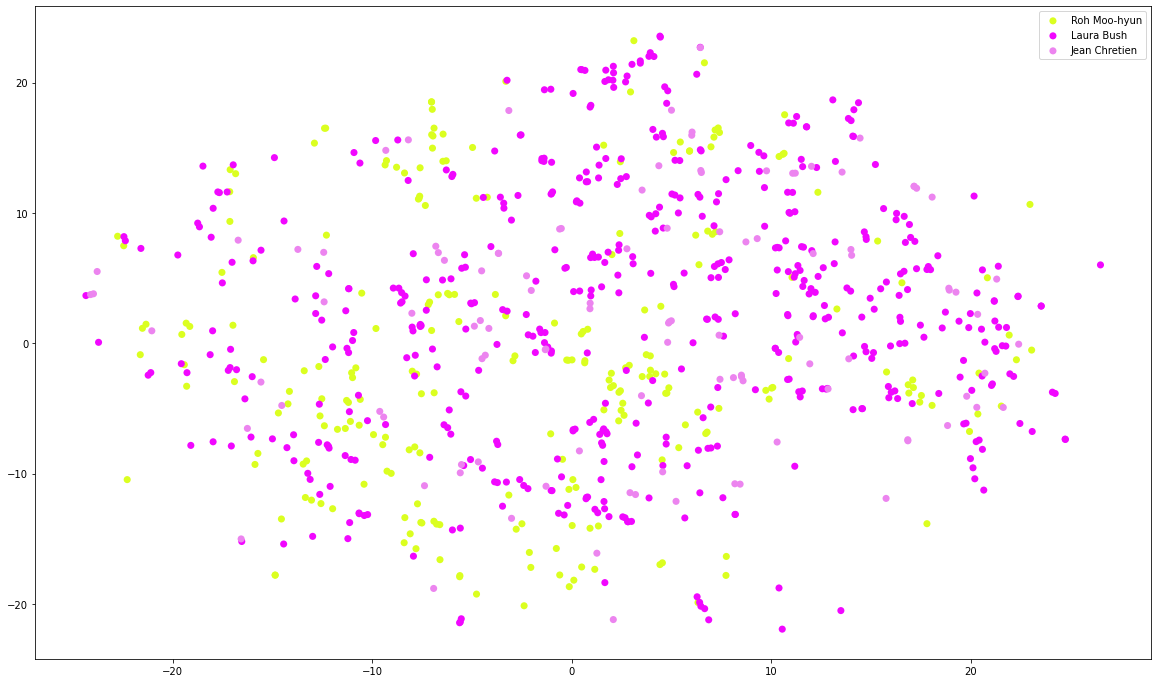

In [59]:
s = [5, 8, 9]
tsne = TSNE(n_components=2, n_iter=400)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(20, 12))
for d in s:
  norm = Normalize(vmin=0, vmax=10)
  color = plt.cm.gist_ncar(norm(d))
  plt.scatter(X_tsne[:, 0][y == d],
                X_tsne[:, 1][y == d],
                c=[color] * len(X_tsne[:, 0][y == d]), label=names[y_test[d]], edgecolor='none', s=50)
plt.legend()

**PCA кучнее, а TSNE визуально разделяет лучше. Поэтому я бы выбрал TSNE**